## Data Preprocessing

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
path = "DATASET-balanced.csv"
data = pd.read_csv(path)
data['LABEL'] = data['LABEL'].map({"REAL":1,"FAKE":0})

In [ ]:
data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975,1
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128,1
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982,1
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419,1


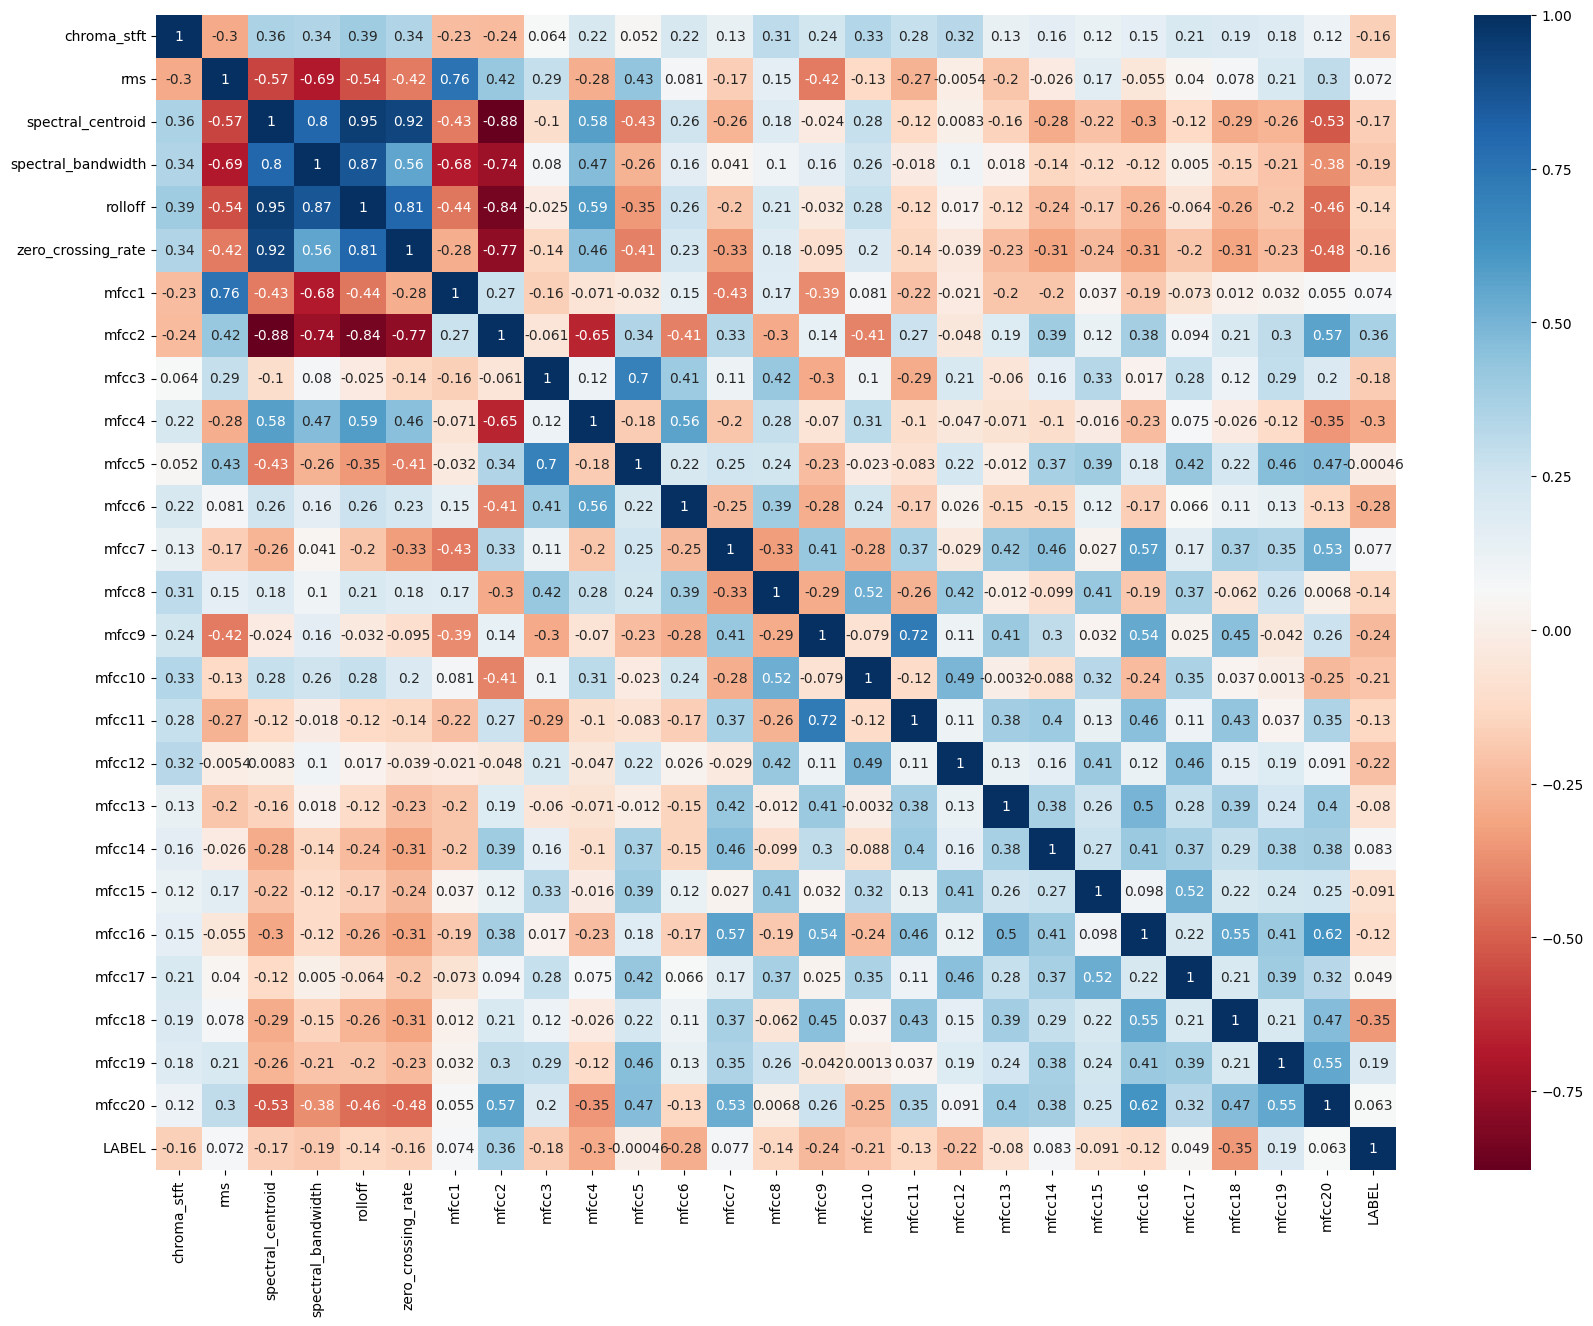

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='RdBu',annot=True)

plt.show()

In [ ]:
data.drop(columns=["mfcc18","mfcc4"],inplace=True)
data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,-0.092606,...,-14.181895,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,8.610174,...,0.372541,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,-9.747897,...,-3.099179,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,1.098719,...,1.513633,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,-3.085768,...,11.086248,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,-1.793357,-5.060998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,-23.751667,...,-2.950688,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-4.483765,-3.355975,1
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,39.615837,...,-2.910435,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,2.171270,-1.660128,1
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,-30.417339,...,-17.552000,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-4.405540,-15.869982,1
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,31.465832,...,-7.348275,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,3.811063,3.948419,1


In [ ]:
x = data.drop(columns=['LABEL'],axis=1)
y = data.iloc[:,-1]
y
# data splite in x , y    lable split from actual

0        0
1        0
2        0
3        0
4        0
        ..
11773    1
11774    1
11775    1
11776    1
11777    1
Name: LABEL, Length: 11778, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split   #split x train and y train  making 80 traning and 20 testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

#scaling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)


In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = rf.predict(x_test)

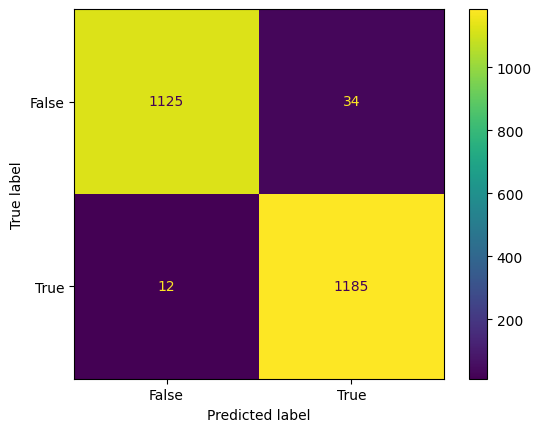

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)      #accuracy score

0.9804753820033956

In [ ]:
import librosa as lb
def extract_feature(path):
    y,sr = lb.load(path)
    features = []
    chroma_stft = np.mean(lb.feature.chroma_stft(y=y,sr=sr))
    spct_cent = np.mean(lb.feature.spectral_centroid(y=y,sr=sr))
    spect_band = np.mean(lb.feature.spectral_bandwidth(y=y,sr=sr))
    rollof = np.mean(lb.feature.spectral_rolloff(y=y,sr=sr))
    rms = np.mean(lb.feature.rms(y=y))
    zero_crossing_rate = np.mean(lb.feature.zero_crossing_rate(y=y))
    features.append(chroma_stft)
    features.append(rms)
    features.append(spct_cent)
    features.append(spect_band)
    features.append(rollof)
    features.append(zero_crossing_rate)
    mfccs = lb.feature.mfcc(y=y,sr=sr)
    mfccs = np.delete(mfccs,3,axis=0)
    mfccs = np.delete(mfccs,17,axis=0)
    for mean in np.mean(mfccs,axis=1):
        features.append(mean)

    return features




In [ ]:
f

[0.39570555,
 0.06438,
 1841.3196059597658,
 1838.0559992778271,
 3386.358689818958,
 0.08929726804373066,
 -261.09406,
 119.219925,
 -10.147601,
 12.508325,
 -3.9494388,
 3.5333066,
 -1.3474874,
 -2.8008862,
 6.783764,
 -6.68391,
 1.4926848,
 0.07112089,
 3.3981092,
 1.6101464,
 1.8576201,
 -0.25368086,
 3.2093143,
 -0.6412276]

In [ ]:
f= extract_feature("/content/linus-original-DEMO.mp3")

In [ ]:
pred = rf.predict([f])
pred

array([1])

In [ ]:
fake = extract_feature("/content/linus-to-musk-DEMO.mp3")


In [ ]:
fake = scale.transform([fake])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pred = rf.predict(fake)
pred

array([0])

### Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/DATASET-balanced.csv")
X = dataset.iloc[:,:-1].values   #data feature in x not last col
y = dataset.iloc[:,-1].values    #lables

X = np.delete(X, 9, 1)
X = np.delete(X, 22, 1)

In [ ]:
from sklearn import preprocessing   #ml sacling performance

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
print(X[0])
print(len(X))
print(y)

[ 3.38055000e-01  2.79480000e-02  2.84294887e+03  4.32291676e+03
  6.57058619e+03  4.10500000e-02 -4.62169586e+02  9.03112720e+01
  1.90737690e+01 -9.26060000e-02  5.96393300e+00 -1.20731190e+01
 -1.52692500e+00 -6.73584500e+00 -9.34483100e+00 -1.41818950e+01
 -6.68656400e+00  9.02086000e-01 -7.25155100e+00 -1.19834200e+00
  4.74740300e+00 -4.98627900e+00 -5.01313800e+00 -6.77906000e+00]
11778
[0 0 0 ... 1 1 1]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split    #80% teaning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#scaling the high value data
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Classification Models

### MLP Model

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter = 1000)
MLP_classifier.fit(X_train, y_train)
y_pred = MLP_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 99.1511%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1166
           1       0.99      0.99      0.99      1190

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1153   13]
 [   7 1183]]


### GB Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train, y_train)
y_pred = GB_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 94.9915%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1166
           1       0.96      0.94      0.95      1190

    accuracy                           0.95      2356
   macro avg       0.95      0.95      0.95      2356
weighted avg       0.95      0.95      0.95      2356

Confusion Matrix:
[[1123   43]
 [  75 1115]]


### LightGBM Model

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
LGBM_classifier = LGBMClassifier()
LGBM_classifier.fit(X_train, y_train)
y_pred = LGBM_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 4699, number of negative: 4723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498726 -> initscore=-0.005094
[LightGBM] [Info] Start training from score -0.005094
Accuracy = 98.3022%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1166
           1       0.99      0.98      0.98      1190

    accuracy                           0.98      2356
   macro avg       0.98      0.98      0.98      2356
weighted avg       0.98      0.98      0.98      2356

Confusion Matrix:
[[1151   15]
 [  25 1165]]


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


### CatBoost Model

In [ ]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier(logging_level='Silent')
CB_classifier.fit(X_train, y_train)
y_pred = CB_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.7267%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1166
           1       0.99      0.98      0.99      1190

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1154   12]
 [  18 1172]]


In [ ]:
!pip install xgboost

### XGBoost Model

In [ ]:
from xgboost import XGBClassifier
XGBC_classifier = XGBClassifier()
XGBC_classifier.fit(X_train, y_train)
y_pred = XGBC_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.2173%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1166
           1       0.99      0.98      0.98      1190

    accuracy                           0.98      2356
   macro avg       0.98      0.98      0.98      2356
weighted avg       0.98      0.98      0.98      2356

Confusion Matrix:
[[1151   15]
 [  27 1163]]


### Extra Trees Model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ET_classifier = ExtraTreesClassifier()
ET_classifier.fit(X_train, y_train)
y_pred = ET_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.6418%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1166
           1       0.99      0.98      0.99      1190

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1155   11]
 [  21 1169]]


### Random Forest Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 97.6231%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1166
           1       0.99      0.97      0.98      1190

    accuracy                           0.98      2356
   macro avg       0.98      0.98      0.98      2356
weighted avg       0.98      0.98      0.98      2356

Confusion Matrix:
[[1151   15]
 [  41 1149]]


### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(X_train, y_train)
y_pred = decision_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 92.8268%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1166
           1       0.93      0.92      0.93      1190

    accuracy                           0.93      2356
   macro avg       0.93      0.93      0.93      2356
weighted avg       0.93      0.93      0.93      2356

Confusion Matrix:
[[1089   77]
 [  92 1098]]


### Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(max_iter = 1000)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 87.5212%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1166
           1       0.88      0.87      0.88      1190

    accuracy                           0.88      2356
   macro avg       0.88      0.88      0.88      2356
weighted avg       0.88      0.88      0.88      2356

Confusion Matrix:
[[1023  143]
 [ 151 1039]]


### Kernal SVM

In [ ]:
from sklearn.svm import SVC
kernal_classifier = SVC(kernel = 'rbf')
kernal_classifier.fit(X_train, y_train)
y_pred = kernal_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.9389%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1166
           1       0.99      0.99      0.99      1190

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1156   10]
 [  15 1175]]


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 88.1154%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1166
           1       0.89      0.87      0.88      1190

    accuracy                           0.88      2356
   macro avg       0.88      0.88      0.88      2356
weighted avg       0.88      0.88      0.88      2356

Confusion Matrix:
[[1044  122]
 [ 158 1032]]


### K-Nearest Neighbors (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K_nearest_classifier = KNeighborsClassifier()
K_nearest_classifier.fit(X_train, y_train)
y_pred = K_nearest_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.9813%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1166
           1       0.99      0.99      0.99      1190

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1152   14]
 [  10 1180]]


### Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(X_train,y_train)
y_pred = naive_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 80.6027%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1166
           1       0.86      0.74      0.79      1190

    accuracy                           0.81      2356
   macro avg       0.81      0.81      0.81      2356
weighted avg       0.81      0.81      0.81      2356

Confusion Matrix:
[[1017  149]
 [ 308  882]]


## Voting Classifier Model

In [ ]:
from sklearn.ensemble import VotingClassifier

from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter = 1000)

from sklearn.ensemble import GradientBoostingClassifier
GB_classifier = GradientBoostingClassifier()

from lightgbm import LGBMClassifier
LGBM_classifier = LGBMClassifier()

from xgboost import XGBClassifier
XGBC_classifier = XGBClassifier()

from sklearn.ensemble import ExtraTreesClassifier
ET_classifier = ExtraTreesClassifier()

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(max_iter = 1000)

from sklearn.svm import SVC
kernal_classifier = SVC(kernel = 'rbf')

from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear')


ensemble = VotingClassifier(
    estimators=[
        ('MLPC', MLP_classifier),
        ('GBC', GB_classifier),
        ('LGBMC', LGBM_classifier),
        ('XGBC', XGBC_classifier),
        ('ETC', ET_classifier),
        ('RFC', random_forest_classifier),
        ('DTC', decision_classifier),
        ('LC', logistic_classifier),
        ('KSVMC', kernal_classifier),
        ('SVMC', svm_classifier)
        ],
    voting='hard')
ensemble.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4699, number of negative: 4723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498726 -> initscore=-0.005094
[LightGBM] [Info] Start training from score -0.005094


VotingClassifier(estimators=[('MLPC', MLPClassifier(max_iter=1000)),
                             ('GBC', GradientBoostingClassifier()),
                             ('LGBMC', LGBMClassifier()),
                             ('XGBC',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('ETC', ExtraTreesClassifier()),
                             ('RFC', RandomForestClassifier()),
                             ('DTC', DecisionTreeClassifier()),
                             ('LC', LogisticRegression(max_iter=1000)),
                             ('KSVMC', SVC()), ('SVMC', SVC(kernel='linear'))])

In [ ]:
y_pred = ensemble.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.5144%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1166
           1       0.99      0.98      0.99      1190

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1157    9]
 [  26 1164]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['LGBM_classifier: ', LGBMClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')],
               ['XGB :', XGBClassifier()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['Kernel SVM :', SVC(kernel = 'rbf')],
               ['Linear SVM :', SVC(kernel = "linear")],
               ['SVM :', SVC()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ]

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(name, accuracy_score(y_test, y_pred)*100)

Neural Network : 99.27843803056027
GradientBoostingClassifier:  94.99151103565366
[LightGBM] [Info] Number of positive: 4699, number of negative: 4723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498726 -> initscore=-0.005094
[LightGBM] [Info] Start training from score -0.005094
LGBM_classifier:  98.30220713073004
CatBoost : 98.72665534804754
XGB : 98.21731748726656
ExtraTreesClassifier : 98.3446519524618
RandomForest : 97.70797962648557
DecisionTree : 93.1239388794567
LogisticRegression : 87.52122241086587
Kernel SVM : 98.93887945670629
Linear SVM : 88.11544991511036
SVM : 98.93887945670629
KNeighbours : 98.98132427843804
Naive Bayes : 80.60271646859083
AdaBoostClassifier : 90.4074702886248
